### 02. Recognize objects in the picture datasets provided along with this manuscript.
#### A.	[LO 2] Get HOG descriptors of the input image dataset and train using one of any machine learning model of your preferences.

In [53]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure 
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import svm

In [54]:
train_path_flowers = '02/input/flowers'
train_path_things = '02/input/person_car_cup'

In [74]:
train_flower_names = os.listdir(train_path_flowers)
train_thing_names = os.listdir(train_path_things)

In [75]:
train_flowers = []
flowers_index = []

for idx, flower_type in enumerate(train_flower_names):
    for flower in os.listdir(f"{train_path_flowers}/{flower_type}"):
        path = f"{train_path_flowers}/{flower_type}/{flower}"
        img = cv2.imread(path)
        img = cv2.resize(img, (128*4, 64*4))
        # gray = cv2.cvtColor(flowers, cv2.COLOR_BGR2GRAY)
        # image = np.array(flowers).flatten()
        train_flowers.append(img)
        flowers_index.append(idx)

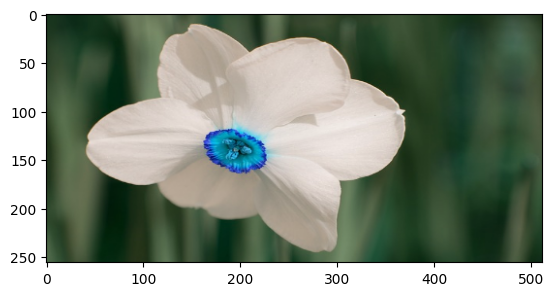

In [76]:
plt.imshow(train_flowers[0], cmap="gray")

In [77]:
# for img in train_flowers:
fd, hog_image = hog(train_flowers[0], orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=True)
plt.axis("off")

plt.imshow(hog_image, cmap="gray")
plt.show()

ValueError: negative dimensions are not allowed

In [65]:
from sklearn.preprocessing import StandardScaler 

flows = np.float64(train_flowers)

scaled = StandardScaler().fit(flows)
x = scaled.transform(flows)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [50]:
"""train_things = []
things_index = []

for idx, item_type in enumerate(train_thing_names):
    for item in os.listdir(f"{train_path_things}/{item_type}"):
        items = cv2.imread(f"{train_path_things}/{item_type}/{item}")
        train_things.append(items)
        things_index.append(idx)"""

In [52]:
samples = np.float32(train_flowers)
labels = np.array(flowers_index)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (24,) + inhomogeneous part.

++++++++++++++++++++++++++++++++

In [39]:
things_index

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [21]:
# xy_train_flowers = np.array_split(np.array(train_flowers), 2)
# xy_train_things = np.array_split(np.array(train_things), 2)

C:\Users\khojo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [31]:
print(len(xy_train_things[0]))

8


In [37]:
train_flower_hog = []

for i in range(len(xy_train_flowers[0])):
    fd, hog_image = hog(xy_train_flowers[0][i], orientations=0, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=True, channel_axis=True)
    train_flower_hog.append(fd)

In [ ]:
for i in range(len(xy_train_things[0])):
    fd_things, hog_image_things = hog(xy_train_things[0][i], orientations=0, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=True, channel_axis=True)

In [38]:
linear_svm = svm.SVC(kernel='linear')
linear_svm = svm.SVC()
linear_svm.fit(train_flower_hog, xy_train_flowers[1])

ValueError: Found array with 0 feature(s) (shape=(12, 0)) while a minimum of 1 is required.

#### B.	[LO 3] Once the training process is completed, employ your trained model to detect the object prepared in “the test images” and comment on the results!